In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [ ]:
pipeline_baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv", index_col=0).rename(columns = {"Method": "method"})
pipeline_baselines[pipeline_baselines["csv_file"] == "AutoMPG.csv"]

,csv_file,method,split,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),CE (4 KNN)
40,AutoMPG.csv,Domain A Pipeline Baseline,random,0.853003,0.891389,0.867925,0.400147,0.362866,0.837942
41,AutoMPG.csv,Domain B Pipeline Baseline,random,0.717576,0.705817,0.758699,0.540866,0.597198,0.589965
42,AutoMPG.csv,Domain A Pipeline Baseline,even,0.856505,0.876371,0.842714,0.436671,0.387142,0.838667
43,AutoMPG.csv,Domain B Pipeline Baseline,even,0.715317,0.824578,0.772369,0.525322,0.461160,0.664236
44,AutoMPG.csv,Domain A Pipeline Baseline,turn,0.855654,0.894404,0.850249,0.426083,0.357794,0.817890
45,AutoMPG.csv,Domain B Pipeline Baseline,turn,0.860148,0.838246,0.850249,0.426083,0.442830,0.817890
46,AutoMPG.csv,Domain A Pipeline Baseline,skewed,0.603672,0.526916,0.638252,0.662237,0.757319,0.569903
47,AutoMPG.csv,Domain B Pipeline Baseline,skewed,0.853153,0.912196,0.861153,0.410278,0.326263,0.835345
48,AutoMPG.csv,Domain A Pipeline Baseline,distort,0.855654,0.894404,0.850249,0.426083,0.357794,0.817890
49,AutoMPG.csv,Domain B Pipeline Baseline,distort,0.841350,0.861267,0.844655,0.433968,0.410109,0.795782


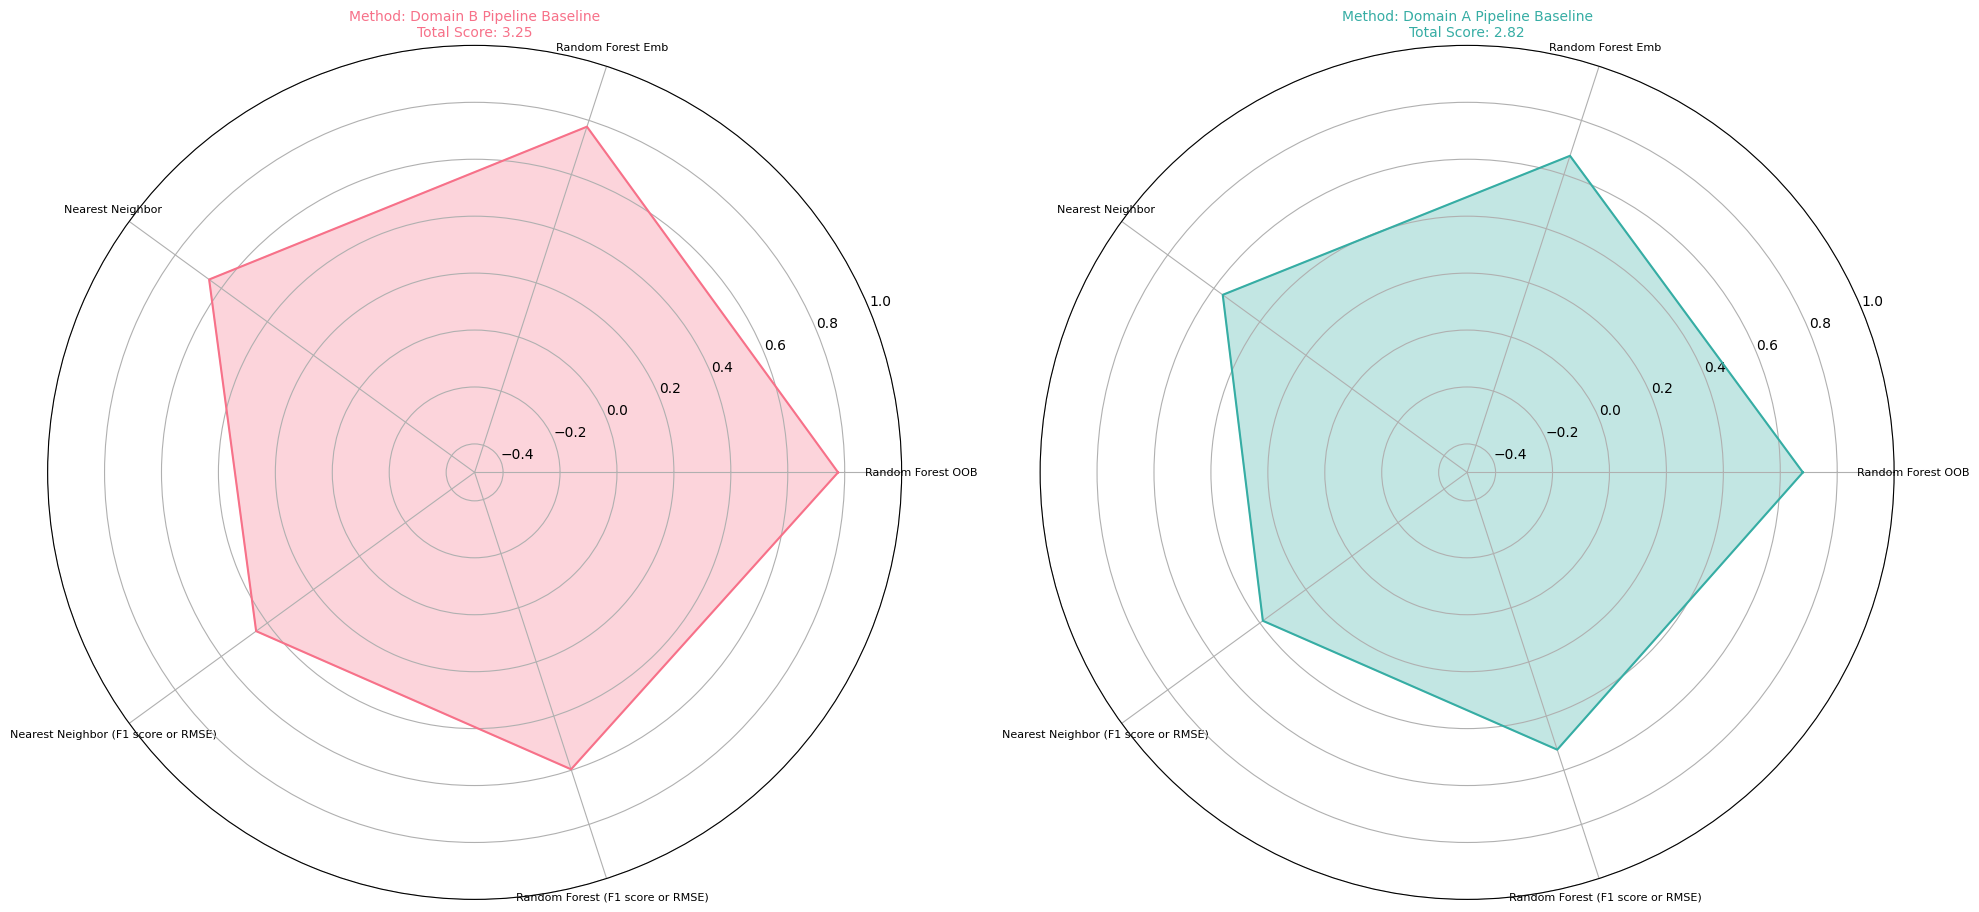

In [3]:
plot_radial(pipeline_baselines, ['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

In [ ]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines_in_sample = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataTrainTest.csv", index_col=0).rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
446,Automobile,random,26,0.703477,0.351215
38,ComputerHardware,distort,42,0.367334,0.369122
661,AirfoilSelfNoise,skewed,33,0.120158,0.381629
438,Automobile,even,34,0.521987,0.754522
240,SML2010,skewed,2,0.940493,0.993189


In [ ]:
# Group by csv_file and select the row with the 3rd smallest knn value
third_smallest_knn = baselines.groupby(by = ["csv_file", "split"]).apply(lambda x: x.nsmallest(3, 'KNN').iloc[-1]).reset_index(drop=True)

# Ensure the resulting DataFrame has the same format as baselines_grouped
third_smallest_knn_grouped = third_smallest_knn.groupby(by=["csv_file", "split"]).agg({
    "A_Classification_Score": "max",
    "B_Classification_Score": "max"
}).reset_index()

third_smallest_knn_grouped

,csv_file,split,A_Classification_Score,B_Classification_Score
0,AirfoilSelfNoise,distort,0.618199,0.569388
1,AirfoilSelfNoise,even,0.276153,0.236131
2,AirfoilSelfNoise,random,0.102140,0.120893
3,AirfoilSelfNoise,skewed,0.130755,0.306649
4,AirfoilSelfNoise,turn,0.618199,0.618291
...,...,...,...,...
65,SML2010,distort,0.805852,0.794499
66,SML2010,even,0.894993,0.724169
67,SML2010,random,0.673677,0.159716
68,SML2010,skewed,0.687260,0.826502


In [6]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
try:
    baselines_grouped.drop(columns = ["Unnamed: 0"], inplace= True)
except:
    print("Didn't need to run")

baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

Didn't need to run


,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.731098,0.583344
46,Hydrodynamics,even,-0.132785,0.971827
47,Hydrodynamics,random,0.904653,-0.135059
48,Hydrodynamics,skewed,-0.134976,0.916070
49,Hydrodynamics,turn,0.731098,0.730979


<Axes: xlabel='csv_file'>

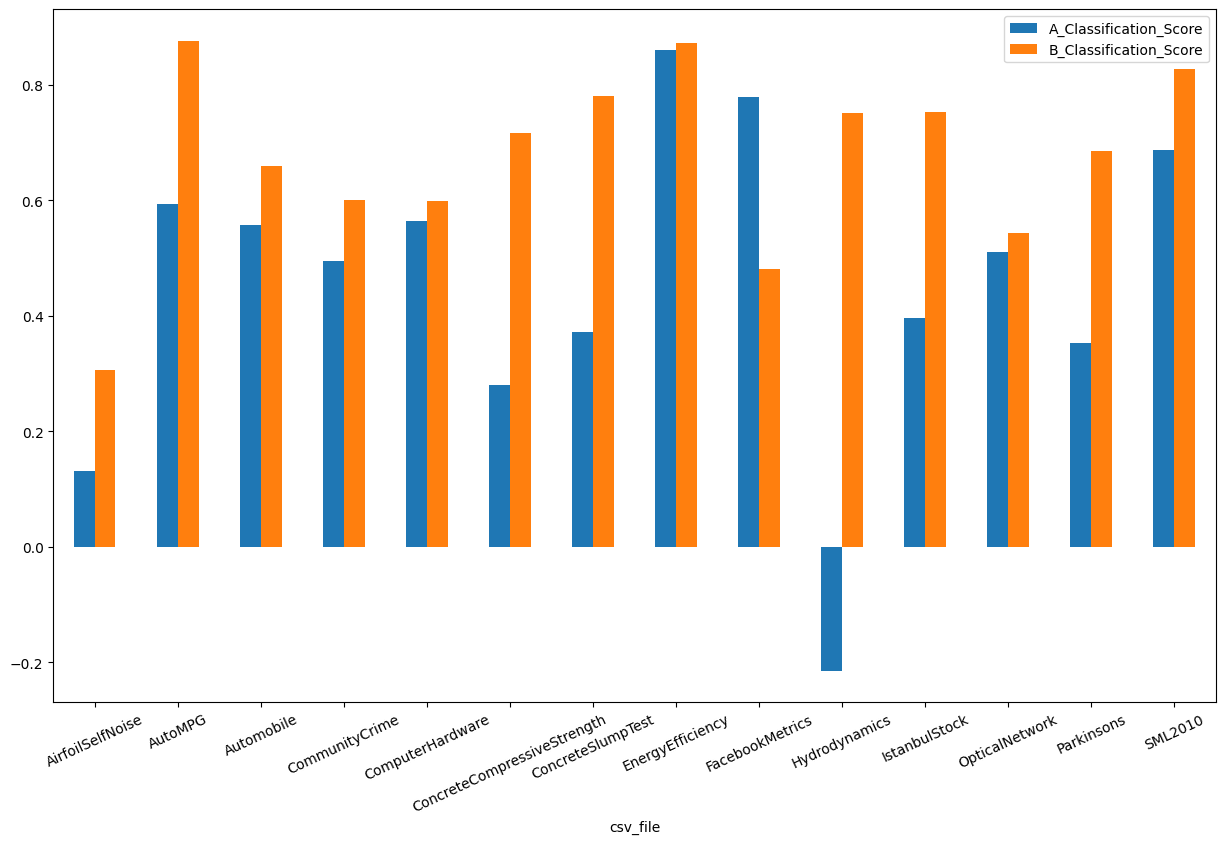

In [7]:
third_smallest_knn_grouped[third_smallest_knn_grouped["split"] == "skewed"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)

# Model Comparison

In [8]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)


File Length: 1207


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
260,MALI-RF,EnergyEfficiency,skewed,0.3,"{'knn': 2, 'mu': 0.3, 't': 3, 'transition_only...",{'42': -0.24904366959160806},{'42': 0.2511698404947917},{'42': -0.1344825362151485},{'42': -0.05540344028447364},{'42': -0.018405527057465676},{'42': 1.021100761319178},{'42': 1.0394832100998168},"{'42': {'RF-OOB': -0.12170114173564417, 'KNN':...",{}
174,SSMA,Hydrodynamics,turn,0.3,"{'knn': 44, 'Uincluded': False, 'Dincluded': T...","{'42': 0.6729272073779818, '1738': 0.672927207...","{'42': 0.008525000000000001, '1738': 0.0085250...","{'42': 0.856877121832599, '1738': 0.8369431273...","{'42': 0.21394799069620063, '1738': -0.3115042...","{'42': 0.47633775544515644, '1738': 0.05841971...","{'42': 0.7910268868209213, '1738': 1.027623809...","{'42': 0.9691505687390388, '1738': 1.212803214...","{'42': {'RF-OOB': 0.7849690323475031, 'KNN': -...",{}
968,SSMA,ConcreteSlumpTest,distort,0.3,"{'knn': 20, 'Uincluded': True, 'Dincluded': True}","{'42': 0.437476996544814, '1738': 0.2990789215...","{'42': 0.16320877381423482, '1738': 0.20029396...","{'42': 0.3789075811198608, '1738': 0.028936113...","{'42': 0.30255250075484164, '1738': -0.0586275...","{'42': 0.2913456434931574, '1738': -0.04603346...","{'42': 0.7204442189841692, '1738': 0.914792817...","{'42': 0.714724864291414, '1738': 0.9202833103...","{'42': {'RF-OOB': 0.15329608567643116, 'KNN': ...",{}
520,RF-NAMA,OpticalNetwork,turn,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.20863837260260154, '1738': -0.227244...","{'42': 2.015621063240111e-05, '1738': 1.511715...","{'42': 0.036864133069917426, '1738': 0.0340458...","{'42': 0.0012108031373870842, '1738': -0.02973...","{'42': 0.01196231215456467, '1738': -0.0070674...","{'42': 1.0040028985164067, '1738': 0.999820721...","{'42': 1.0094507368670325, '1738': 1.011011285...","{'42': {'RF-OOB': 0.014939864920349821, 'KNN':...",{}
544,MALI,AutoMPG,random,0.3,"{'knn': 2, 'mu': 0.01, 't': 5, 'transition_onl...","{'42': 0.48822929311994445, '1738': 0.55376318...","{'42': 0.2762065285297793, '1738': 0.200983965...","{'42': 0.48628461325974337, '1738': 0.63762269...","{'42': 0.4985579639493136, '1738': 0.467427494...","{'42': 0.5367057054278184, '1738': 0.431637543...","{'42': 0.6230357483736515, '1738': 0.678184353...","{'42': 0.6481788550499374, '1738': 0.656484452...","{'42': {'RF-OOB': 0.5901653547989781, 'KNN': 0...",{}


In [9]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(third_smallest_knn_grouped, how = "left")

In [10]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
797,RF-SPUD,Automobile,turn,0.3,0.693761,0.000000,0.745604,0.745614,0.825714,0.385137,0.467141,"{'42': {'RF-OOB': 0.5973424061830332, 'KNN': 0...",0.693761,0.612513,0.612513
256,NAMA,EnergyEfficiency,even,0.3,0.365157,0.499349,0.922158,0.925628,0.868470,0.366961,0.275939,"{'42': {'RF-OOB': 0.9257060654992776, 'KNN': 0...",-0.134192,0.849421,0.918324
116,RF-SPUD,Hydrodynamics,even,0.3,-0.216617,0.000105,-0.117906,-0.467516,-0.259614,0.902393,0.974022,"{'42': {'RF-OOB': -0.16526628833050117, 'KNN':...",-0.216723,-0.248379,0.790342


In [11]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = proc_reg_df, metric = "Combined_Metric", return_df=True)#.head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,0.579742,-0.171202,0.900178,0.355952,0.640715,0.769619,NaN,-0.159360,-0.122166,0.900479,0.845669,NaN,-0.355010,-0.128310,-0.074225,0.610397,0.715961
1,IstanbulStock,0.674731,0.292751,0.844776,0.441662,0.661281,0.811195,NaN,0.195857,-0.124704,0.834900,0.730128,NaN,-0.316266,0.366207,0.766318,0.714484,0.771851
2,FacebookMetrics,0.592234,-0.007211,0.759274,0.262851,0.665146,0.685547,0.592401,0.320081,-0.121600,0.744296,0.660645,0.690289,-0.114347,0.503568,0.543361,0.778232,0.691495
3,Hydrodynamics,0.664402,0.532023,0.899806,0.799632,0.671012,0.706608,0.878167,-0.054671,-0.077427,0.895496,0.796840,0.720924,-0.211597,0.759538,0.932535,0.585006,0.790342
4,AirfoilSelfNoise,0.488030,-0.113552,0.962474,0.531724,0.682093,0.859316,0.741527,-0.135461,-0.169613,0.924405,0.848466,NaN,-0.270939,-0.182528,-0.057775,0.618199,0.618291
5,CommunityCrime,0.497916,-0.024250,0.793918,0.535569,0.710046,0.712440,0.583943,-0.142984,-0.192051,0.786104,0.740419,0.642806,-0.290245,-0.139376,0.252467,0.592101,0.599702
6,Automobile,0.757670,0.256283,0.882649,0.715318,0.734306,0.821432,NaN,0.343892,0.098240,0.881048,0.804208,NaN,-0.139808,0.795496,0.769123,0.624074,0.717398
7,OpticalNetwork,0.473332,-0.147061,0.908100,0.518772,0.747207,0.676237,0.924531,-0.180715,-0.182083,0.910902,0.854887,0.774292,-0.350329,0.451797,0.022364,0.615307,0.798834
8,ConcreteSlumpTest,0.513335,0.395941,0.890893,0.623485,0.780732,0.751162,0.570243,0.123935,0.102971,0.816872,0.875523,0.318204,-0.171756,0.852770,0.793678,0.745238,0.779765
9,ComputerHardware,0.962834,0.096644,0.964519,0.686117,0.797657,0.864906,0.581483,0.045628,0.069540,0.949490,0.845673,0.809029,-0.189637,0.927786,0.641705,0.656128,0.626540


<Axes: >

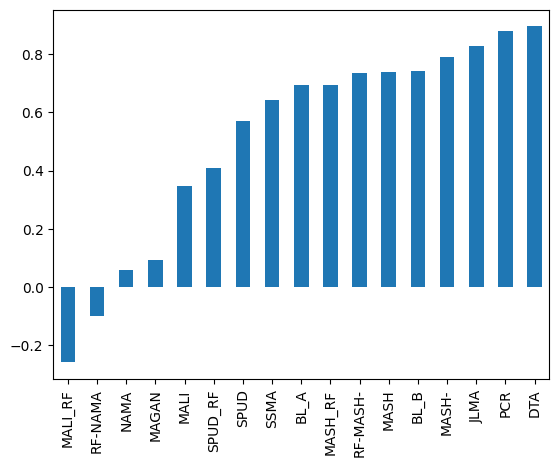

In [12]:
# Visualization
results_df.drop(columns=["csv_file"]).mean(axis = 0).sort_values().plot(kind="bar")

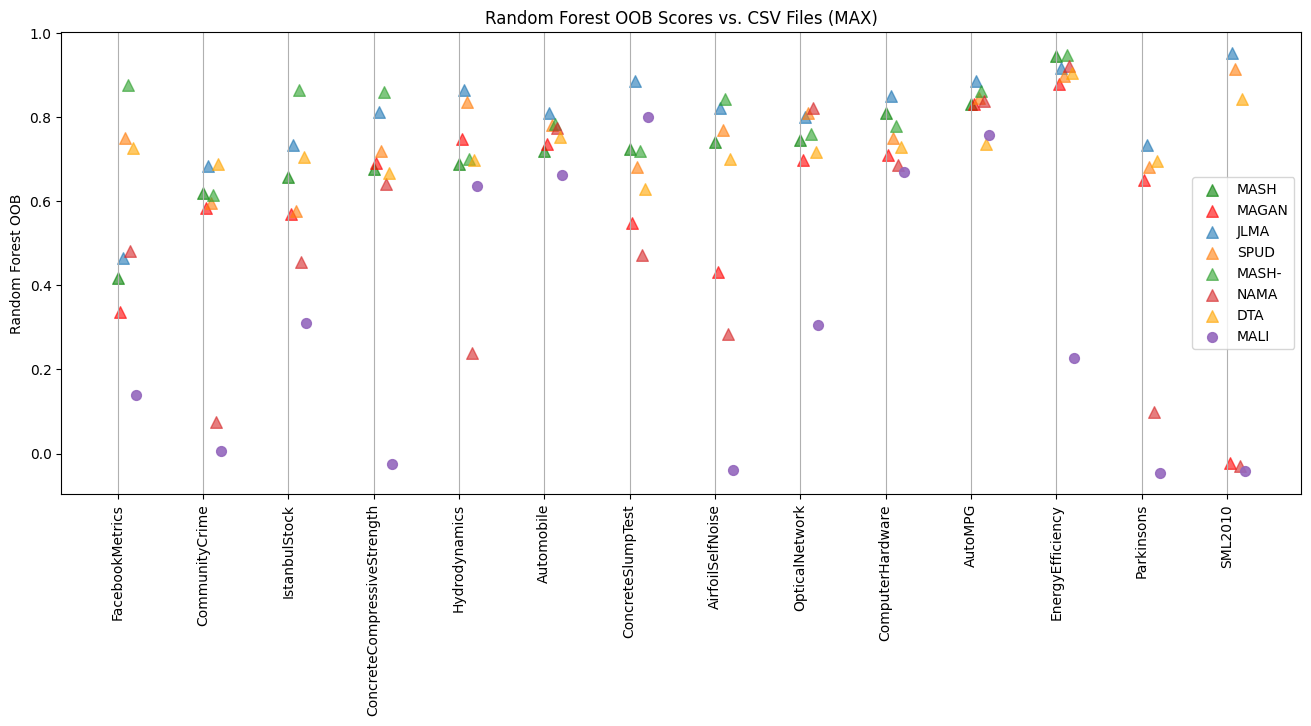

In [13]:
plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB",
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

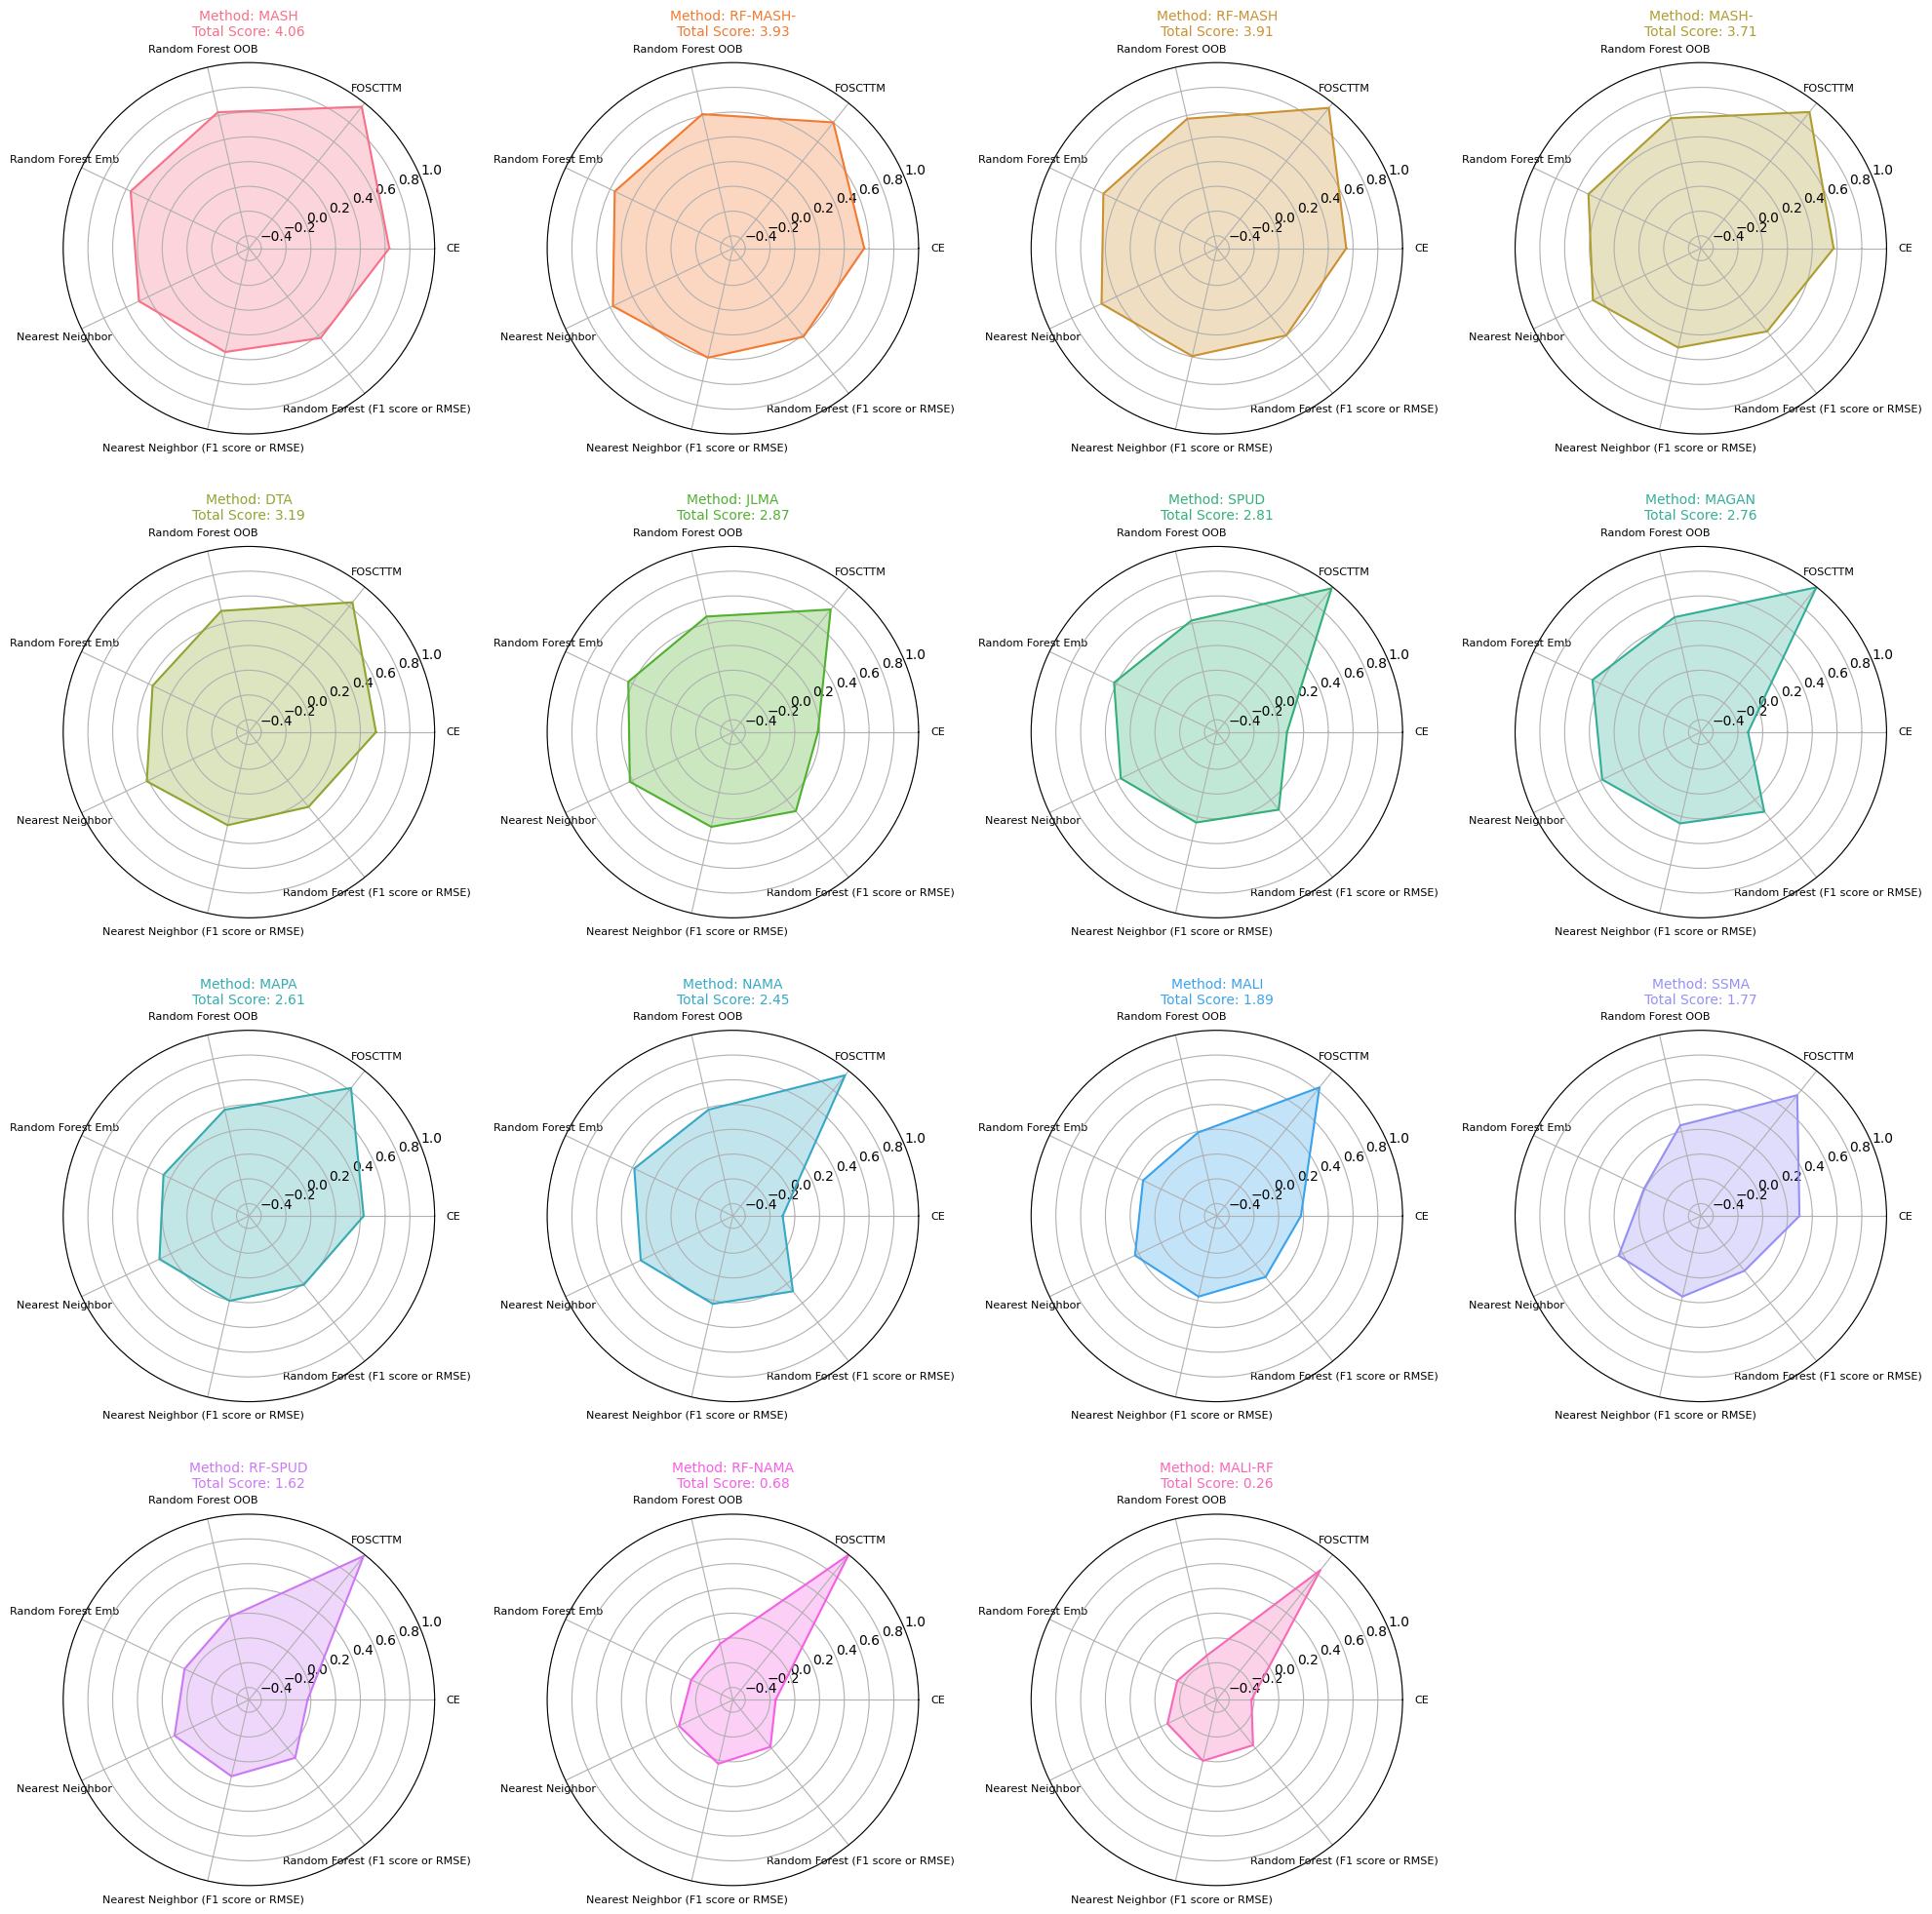

In [14]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [15]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
407,MALI,SML2010,turn,0.3,-0.217719,0.000264,-0.040953,-0.023756,-0.003734,0.993496,1.003347,"{'42': {'RF-OOB': -0.040032598715101786, 'KNN'...",-0.217983,0.805852,0.805852
1084,MALI,ConcreteCompressiveStrength,distort,0.3,-0.181898,0.006317,-0.048378,-0.059236,-0.006025,0.984607,1.010272,"{'42': {'RF-OOB': 0.13735239943230637, 'KNN': ...",-0.188215,0.610397,0.590292


In [16]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
1062,0.053761,0.934700,-0.033898,0.011364,0.977036
1182,0.134870,0.954249,0.075479,0.145640,0.986493


In [ ]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
1106,RF-NAMA,ConcreteCompressiveStrength,turn,0.3,-0.234792,0.000026,-0.053230,-0.062787,-0.001972,0.982831,1.012051,-0.234818,0.610397,0.610926,0.045558,0.938664,-0.005270,-0.062062,0.963409
824,RF-SPUD,IstanbulStock,even,0.3,-0.175836,0.000000,-0.074279,-0.078459,-0.025272,1.132741,1.161750,-0.175836,0.429431,0.771851,0.100629,1.060915,0.081843,-0.116646,1.071938


In [18]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

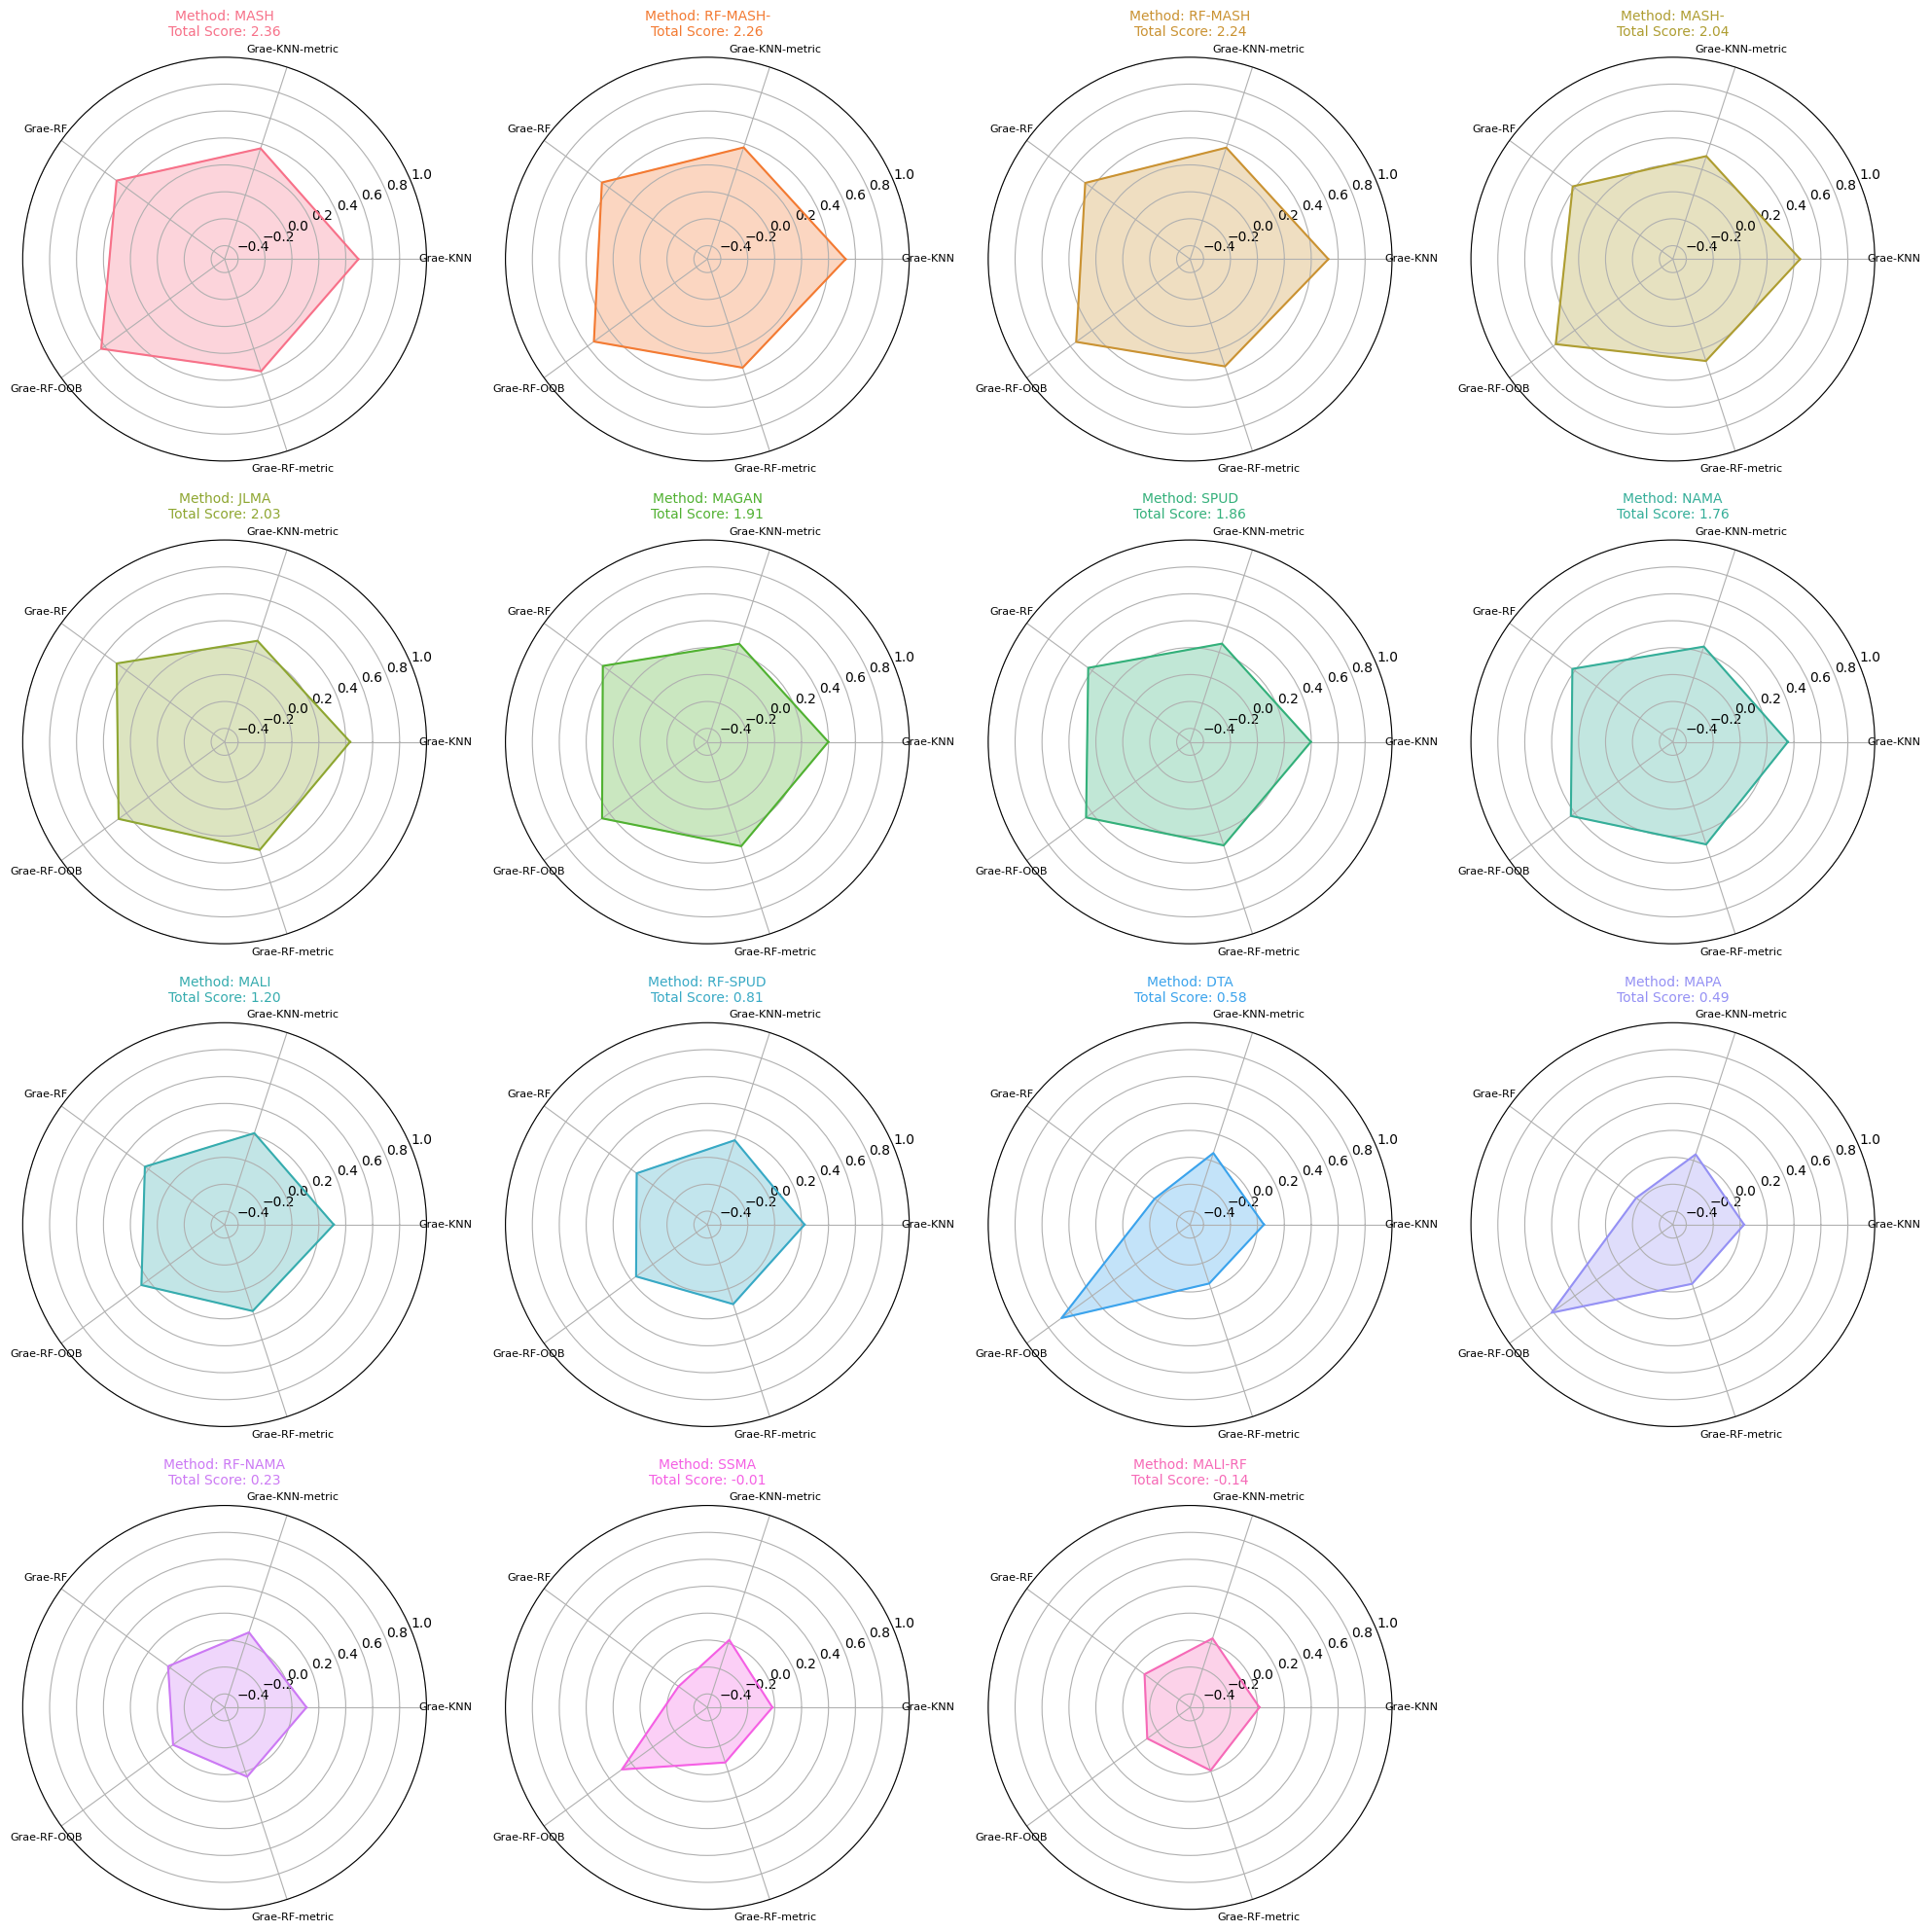

In [19]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

In [20]:
metrics_df = plt_methods_by_metric(df = full_data,
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"],
                    return_df=True)
metrics_df

,index,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF
0,FOSCTTM,0.251462,0.003965,0.158615,0.014085,0.038072,0.092614,0.199102,0.045877,0.000461,0.177010,0.233162,0.049926,0.158884,0.170847,0.014078
1,Random Forest (F1 score or RMSE),0.934083,0.677896,0.727622,0.698604,0.572651,0.641135,0.586289,0.721855,1.014161,0.789241,0.683981,0.600136,1.031648,0.869305,0.900707
2,Combined_Metric,0.044929,-0.122265,0.367539,0.052787,0.595925,0.479875,0.361783,-0.143965,-0.155194,0.249799,-0.046741,0.495118,-0.379007,0.007964,-0.040178
3,Grae-RF-metric,1.069607,0.685366,1.040180,0.691263,0.623982,0.704380,0.651798,0.699235,0.958217,1.037673,0.655668,0.662138,1.007045,0.824874,0.878781
4,CE,0.296391,-0.118300,0.526154,0.066873,0.633997,0.572489,0.560886,-0.098088,-0.154732,0.426809,0.186421,0.545044,-0.220123,0.178812,-0.026099
5,Grae-KNN-metric,0.973206,0.733898,0.941068,0.732760,0.635050,0.695492,0.627683,0.755690,0.914054,0.951236,0.710533,0.629444,0.961203,0.785421,0.840826
6,Nearest Neighbor (F1 score or RMSE),0.832499,0.743620,0.728815,0.751043,0.640369,0.677140,0.593352,0.771800,0.970468,0.796659,0.715125,0.606515,0.994242,0.832154,0.866981


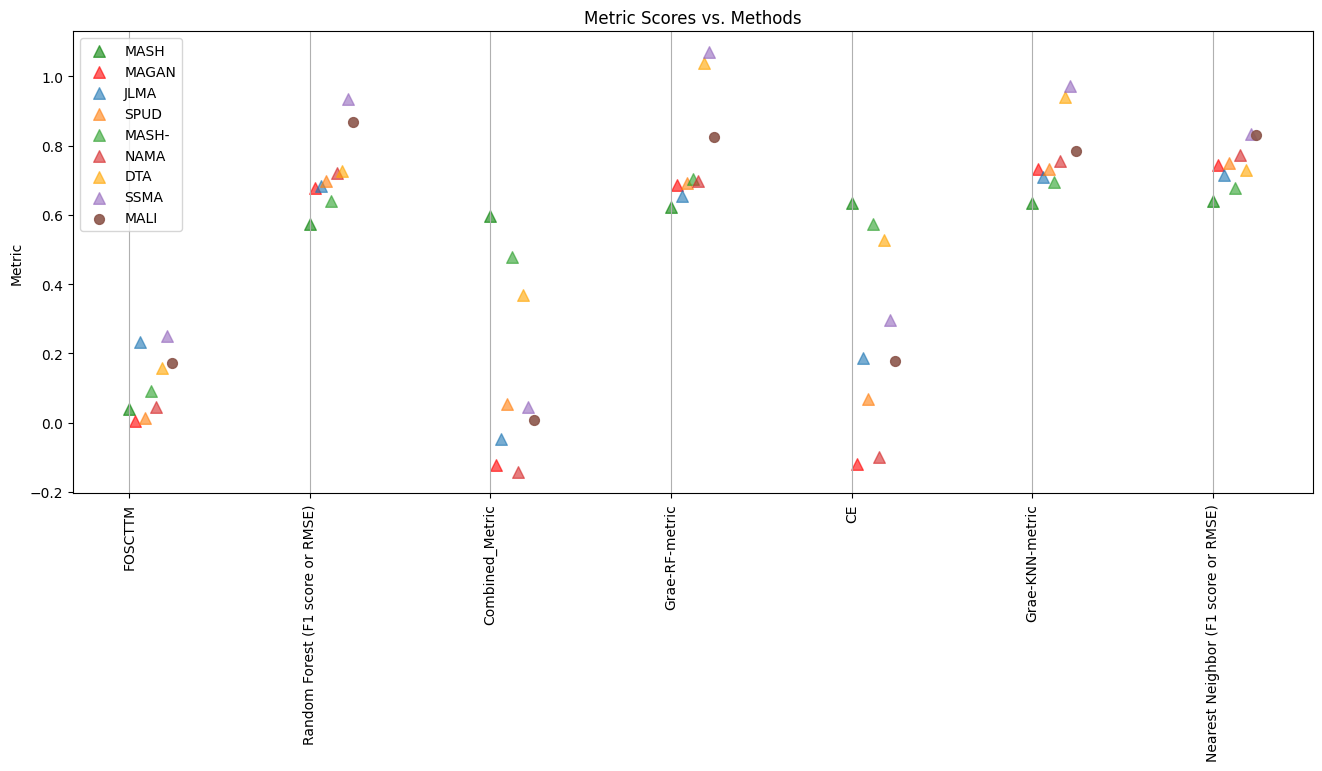

In [21]:
plt_methods_by_metric(df = full_data,
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "SSMA", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

# Compare Grae to RF Extend

In [22]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
234,RF-NAMA,EnergyEfficiency,random,0.3,-0.232627,0.002597,-0.076068,-0.045702,0.057587,0.984330,1.035986,-0.235224,0.867601,0.883075,0.007608,1.007523,-0.147735,-0.098741,1.083789
82,SPUD,ComputerHardware,turn,0.3,0.271845,0.000641,0.603931,0.509547,0.494695,0.716418,0.667399,0.271204,0.626402,0.625985,0.579943,0.909227,0.702046,0.636819,0.765646


In [ ]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.526154,0.158615,0.504363,0.363444,0.415754,0.728815,0.727622,0.367539,0.048444,0.941068,-0.173486,0.681460,1.040180
JLMA,0.186421,0.233162,0.457888,0.437567,0.423654,0.715125,0.683981,-0.046741,0.432510,0.710533,0.491310,0.473705,0.655668
MAGAN,-0.118300,0.003965,0.452572,0.471638,0.383893,0.743620,0.677896,-0.122265,0.398445,0.733898,0.460010,0.466873,0.685366
MALI,0.178812,0.170847,0.190649,0.161692,0.233467,0.832154,0.869305,0.007964,0.310919,0.785421,0.232252,0.263916,0.824874
MALI-RF,-0.220123,0.158884,-0.132888,-0.145124,-0.057266,0.994242,1.031648,-0.379007,0.014820,0.961203,-0.081615,-0.106606,1.007045
MAPA,0.426809,0.177010,0.380295,0.265833,0.301906,0.796659,0.789241,0.249799,0.029179,0.951236,-0.162821,0.614079,1.037673
MASH,0.633997,0.038072,0.627455,0.560329,0.485370,0.640369,0.572651,0.595925,0.494525,0.635050,0.492121,0.632875,0.623982
MASH-,0.572489,0.092614,0.577273,0.507670,0.467229,0.677140,0.641135,0.479875,0.445739,0.695492,0.419307,0.575161,0.704380
NAMA,-0.098088,0.045877,0.380997,0.383521,0.325752,0.771800,0.721855,-0.143965,0.354679,0.755690,0.422478,0.436465,0.699235


In [24]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'MASH', 'MASH-',
        'NAMA', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [25]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [26]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df["Nearest Neighbor (F1 score or RMSE)"] = diff_df["Nearest Neighbor (F1 score or RMSE)"] * -1
diff_df["Random Forest (F1 score or RMSE)"] = diff_df["Random Forest (F1 score or RMSE)"] * -1 #To ensure that they are consistent on same side.

diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.455920,-0.577624,0.589240,-0.047354,0.312557
JLMA,0.025378,-0.272966,-0.067656,-0.241420,-0.028313
MAGAN,0.054127,-0.262260,-0.076117,-0.276747,0.007470
MALI,-0.120270,-0.623730,0.001216,-0.568238,-0.044431
MALI-RF,-0.147707,-1.106327,0.024349,-1.100848,-0.024603
MAPA,0.351116,-0.685403,0.464726,-0.182580,0.248432
MASH,0.132929,-0.074721,-0.006752,-0.007494,0.051331
MASH-,0.131534,-0.187822,0.047922,-0.101979,0.063244
NAMA,0.026318,-0.372168,-0.096726,-0.335334,-0.022620


<Axes: xlabel='method'>

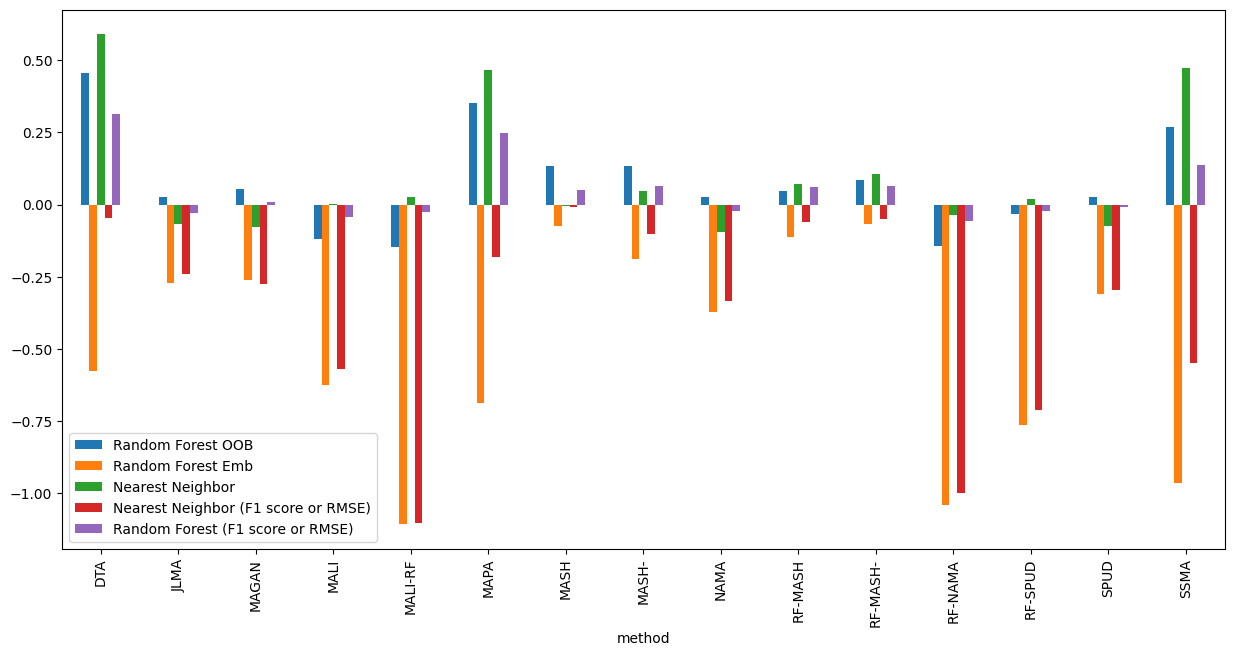

In [27]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
Also note that the RMSE is multiplied by -1 so that the bar is on the side where the method is more favorable for it
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [28]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
1135,SSMA,AirfoilSelfNoise,random,0.3,"{'knn': 219, 'Uincluded': False, 'Dincluded': ...",-0.264623,0.291009,"{'42': -0.04395734458164102, '1738': -0.096884...","{'42': -0.08250789564583916, '1738': -0.116132...","{'42': 0.06179671777131435, '1738': 0.08033855...","{'42': 0.9297117797585847, '1738': 0.963128383...","{'42': 0.9986548051950894, '1738': 1.061031155...","{'42': {'RF-OOB': -0.1690748049860602, 'KNN': ...",{},-0.555631
564,MAPA,AutoMPG,random,0.3,"{'knn': 74, 'r': 20}",0.168925,0.318250,"{'42': 0.7769768760608962, '1738': 0.297238777...","{'42': 0.768687664115169, '1738': 0.4666434694...","{'42': 0.6939733322647486, '1738': 0.510410748...","{'42': 0.5043844112062051, '1738': 0.756128037...","{'42': 0.43851193293121316, '1738': 0.78920206...","{'42': {'RF-OOB': 0.8235122463459154, 'KNN': -...",{},-0.149325


### Spud Parameters on STD

In [29]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.293544,0.106728,0.328006
1,0.315521,0.136929,0.113630
2,0.299420,0.038904,0.179496
3,0.257186,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
205,0.303843,0.137920,0.086527
206,0.245030,0.052678,0.133933
207,0.589315,0.178530,0.034385
208,0.222530,0.223938,0.006242


<Axes: >

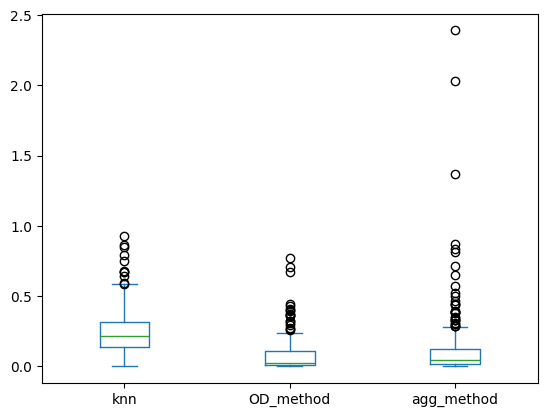

In [30]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [31]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.091198,0.001743,0.056166,0.0
1,0.047936,0.000929,0.009001,0.0
2,0.069745,0.016468,0.034861,0.0
3,0.092476,0.003621,0.057043,0.0
4,0.051415,0.001241,0.002022,0.0
5,0.141600,0.008092,0.227942,0.0
6,0.191730,0.005466,0.008325,0.0
7,0.096132,0.125204,0.018123,0.0
8,0.165853,0.004503,0.059039,0.0
9,0.238521,0.004086,0.118961,0.0


<Axes: >

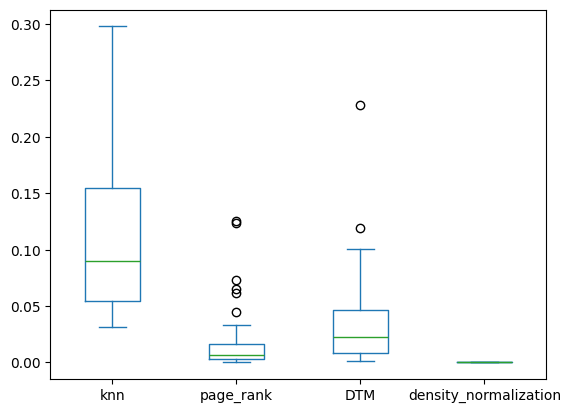

In [32]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [33]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.034223,0.022946,1.110223e-16
1,0.000000,0.000000,0.000000e+00
2,0.006056,0.032130,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.000000,0.000000,0.000000e+00
5,0.000000,0.000000,1.110223e-16
6,0.000000,0.000000,0.000000e+00
7,0.027127,0.181203,0.000000e+00
8,0.000000,0.071349,0.000000e+00
9,0.009295,0.021120,1.253144e-03


<Axes: >

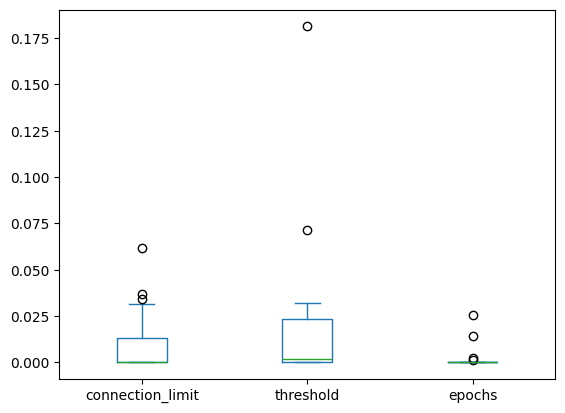

In [34]:
mash_param_df.plot(kind = "box") 